In [1]:
import pandas as pd
import numpy as np

In [2]:
file=pd.read_csv('csv_files/marketing_customer_analysis.csv')
display(file.head())

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
def low(df):
    col=[]
    for column in df.columns:
        col.append(column.lower())
    df.columns=col
    return df.head(2)

In [4]:
low(file)

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize


In [5]:
file._get_numeric_data()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [6]:
file.select_dtypes(include=['object']).columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective to date', 'employmentstatus', 'gender', 'location code',
       'marital status', 'policy type', 'policy', 'renew offer type',
       'sales channel', 'vehicle class', 'vehicle size'],
      dtype='object')

In [7]:
file.isna().sum()

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employmentstatus                 0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
dtype: int64

In [8]:
nulls_df = pd.DataFrame(round(file.isna().sum()/len(file),4)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
display(nulls_df)

,header_name,percent_nulls
0,customer,0.0
1,state,0.0
2,customer lifetime value,0.0
3,response,0.0
4,coverage,0.0
5,education,0.0
6,effective to date,0.0
7,employmentstatus,0.0
8,gender,0.0
9,income,0.0


In [9]:
file['state'].value_counts(dropna=False)

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

the easiest to implement solution, although potentially not the best is to assign the null values to the mode of the column

In [10]:
mode_state=(file['state'].mode())
file['state']=file['state'].fillna(mode_state[0])
file['state'].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

In [11]:
file['response'].value_counts(dropna=False)

No     7826
Yes    1308
Name: response, dtype: int64

It's a reasonable guess that null values for the collumn response would be no, that's what we're changing them to

In [12]:
no_response='No'
file['response']=file['response'].fillna(no_response)
file['response'].value_counts(dropna=False)

No     7826
Yes    1308
Name: response, dtype: int64

In [13]:
file['months since last claim'].value_counts(dropna=False)

3     381
6     364
1     345
4     335
7     333
2     329
0     314
5     313
10    306
11    297
16    295
15    286
13    285
8     279
12    273
14    268
17    263
9     250
19    246
23    239
25    236
21    233
20    231
18    229
22    218
24    211
29    206
28    201
31    190
26    186
30    182
27    182
33    179
34    169
35    142
32    138
Name: months since last claim, dtype: int64

There isn't a very straightforward solution to fixing this issue, so i'll simply compute all the null values as the mean of the column

In [14]:
avg_months=round(np.mean(file['months since last claim']))
file['months since last claim']=file['months since last claim'].fillna(avg_months)
file['months since last claim'].value_counts(dropna=False)

3     381
6     364
1     345
4     335
7     333
2     329
0     314
5     313
10    306
11    297
16    295
15    286
13    285
8     279
12    273
14    268
17    263
9     250
19    246
23    239
25    236
21    233
20    231
18    229
22    218
24    211
29    206
28    201
31    190
26    186
30    182
27    182
33    179
34    169
35    142
32    138
Name: months since last claim, dtype: int64

In [15]:
file['number of open complaints'].value_counts(dropna=False)

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: number of open complaints, dtype: int64

Once again, we'll be making a reasonable guess that null values could simply mean the customer didn't have any open complaints

In [16]:
no_complaints=0.0
file['number of open complaints']=file['number of open complaints'].fillna(no_complaints)
file['number of open complaints'].value_counts(dropna=False)

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: number of open complaints, dtype: int64

In [17]:
file['vehicle class'].value_counts(dropna=False)

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle class, dtype: int64

given all the unique values, i'll chosse to simple aggregate the null values into the mode of the column

In [18]:
mode_vclass=file['vehicle class'].mode()
file['vehicle class']=file['vehicle class'].fillna(mode_vclass[0])
file['vehicle class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle class, dtype: int64

In [19]:
file['vehicle size'].value_counts(dropna=False)

Medsize    6424
Small      1764
Large       946
Name: vehicle size, dtype: int64

given all the unique values, i'll chosse to simple aggregate the null values into the mode of the column

In [20]:
mode_vsize=file['vehicle size'].mode()
file['vehicle size']=file['vehicle size'].fillna(mode_vsize[0])
file['vehicle size'].value_counts()

Medsize    6424
Small      1764
Large       946
Name: vehicle size, dtype: int64

In [21]:
file['vehicle type'].value_counts(dropna=False)

KeyError: 'vehicle type'

Considering the only non null value in this column is 'A' we could either drop the column, since we already have other information on the customer's car anyways, or we could simply guess that ALL vehicles are type A which makes the column have no value either way

In [ ]:
file=file.drop(columns=['vehicle type'])

In [ ]:
f_nulls_df = pd.DataFrame(round(file.isna().sum()/len(file),4)*100)
f_nulls_df = f_nulls_df.reset_index()
f_nulls_df.columns = ['header_name', 'percent_nulls']
display(f_nulls_df)

In [ ]:
file['effective to date'] = pd.to_datetime(file['effective to date'])
file[['effective to date']].dtypes

In [ ]:
file['month']=file['effective to date'].dt.month
display(file['month'].head())

In [ ]:
first_quarter=file[(file['month']==1) | (file['month']==2) | (file['month']==3)]
display(first_quarter)

'''

LAB 3 STARTS HERE

In [26]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer lifetime value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective to date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location code                  9134 non-null   object 
 11  marital status                 9134 non-null   object 
 12  monthly premium auto           9134 non-null   i

In [29]:
file.describe().T

,count,mean,std,min,25%,50%,75%,max
customer lifetime value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly premium auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months since last claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months since policy inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number of open complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number of policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total claim amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='response', ylabel='count'>

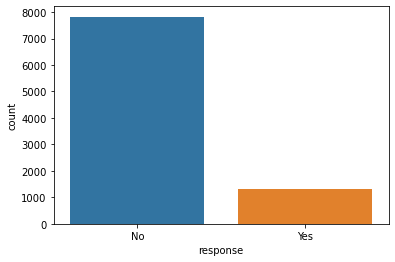

In [32]:
sns.countplot(data=file, x="response")

<AxesSubplot:xlabel='sales channel', ylabel='count'>

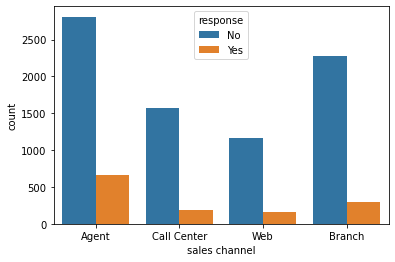

In [34]:
sns.countplot(data=file, x='sales channel', hue='response')

<AxesSubplot:xlabel='total claim amount', ylabel='response'>

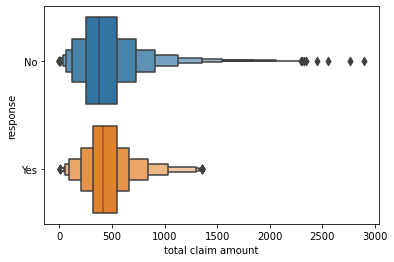

In [41]:
sns.boxenplot(data=file, x='total claim amount', y='response')

<AxesSubplot:xlabel='income', ylabel='Count'>

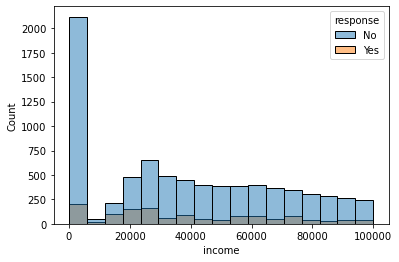

In [38]:
sns.histplot(data=file, x='income', hue='response')